In [35]:
# [1] Install required packages including kagglehub
!pip install nltk gensim wordcloud matplotlib seaborn pandas numpy scikit-learn kagglehub

# [2] Import all necessary libraries
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import kagglehub


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
# [3] Load Dataset using KaggleHub
print("Downloading Amazon Fine Food Reviews dataset using KaggleHub...")

# Download the dataset
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("Path to dataset files:", path)

# List files in the downloaded directory
import os
print("Files in dataset directory:")
for file in os.listdir(path):
    print(f" - {file}")

# Load the dataset
df = pd.read_csv(os.path.join(path, 'Reviews.csv'))
print(f"Dataset shape: {df.shape}")

# Display basic info
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews
Files in dataset directory:
 - hashes.txt
 - Reviews.csv
 - database.sqlite
Dataset shape: (568454, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  

=== Dataset Exploration ===
Total reviews: 568454
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

Missing values:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


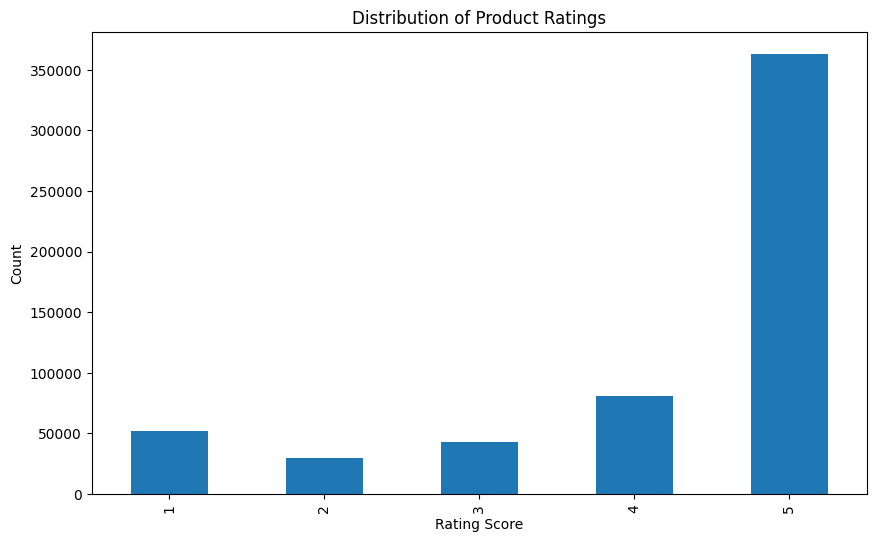

Rating distribution:
Score 1: 52268 reviews (9.19%)
Score 2: 29769 reviews (5.24%)
Score 3: 42640 reviews (7.50%)
Score 4: 80655 reviews (14.19%)
Score 5: 363122 reviews (63.88%)

Sample review: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador...


In [37]:
# [4] Dataset Exploration for Advanced Analysis
print("=== Dataset Exploration ===")
print(f"Total reviews: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Distribution of ratings
plt.figure(figsize=(10, 6))
rating_counts = df['Score'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

print("Rating distribution:")
for score, count in rating_counts.items():
    print(f"Score {score}: {count} reviews ({count/len(df)*100:.2f}%)")

# Sample text for preprocessing demonstration
sample_texts = df['Text'].head(1000).tolist()  # Using first 1000 reviews for demonstration
print(f"\nSample review: {sample_texts[0][:200]}...")

In [38]:
# [5] Advanced Text Preprocessing Class
class AdvancedTextPreprocessor:
    def __init__(self):
        # Initialize NLTK components
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
        self.stemmer = nltk.stem.PorterStemmer()

        # Extended patterns for advanced cleaning
        self.url_pattern = re.compile(r'https?://\S+|www\.\S+')
        self.html_pattern = re.compile(r'<.*?>')
        self.emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    def robust_tokenize(self, text):
        """Robust tokenization with fallback options"""
        try:
            # Try the new tokenizer first
            return nltk.word_tokenize(text)
        except LookupError:
            print("Falling back to simple tokenization...")
            # Fallback to simple whitespace tokenization
            return text.split()

    def tokenize_processed_text(self, processed_text):
        """Tokenize already processed text using the robust tokenizer"""
        return self.robust_tokenize(processed_text)

    def lowercase(self, text):
        """Convert text to lowercase"""
        return text.lower()

    def remove_punctuation(self, text):
        """Remove punctuation and special characters"""
        # Keep basic punctuation that might be useful for some tasks
        text = re.sub(r'[^\w\s\.\!\?]', '', text)
        return text

    def remove_urls(self, text):
        """Remove URLs from text"""
        return self.url_pattern.sub('', text)

    def remove_html(self, text):
        """Remove HTML tags"""
        return self.html_pattern.sub('', text)

    def remove_stopwords(self, text):
        """Remove stopwords with advanced handling"""
        words = text.split()
        # Extended stopwords list
        extended_stopwords = self.stop_words.union({
            'would', 'could', 'should', 'might', 'may', 'also', 'get', 'like'
        })
        filtered_words = [word for word in words if word not in extended_stopwords]
        return ' '.join(filtered_words)

    def stemming(self, text):
        """Apply stemming to text"""
        words = text.split()
        stemmed_words = [self.stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)

    def lemmatization(self, text):
        """Apply lemmatization to text"""
        words = text.split()
        lemmatized_words = [self.lemmatizer.lemmatize(word, pos='v') for word in words]
        return ' '.join(lemmatized_words)

    def full_preprocess(self, text, steps=['lowercase', 'remove_urls', 'remove_html',
                                         'remove_punctuation', 'remove_stopwords',
                                         'lemmatization']):
        """Complete preprocessing pipeline"""
        processed_text = text

        for step in steps:
            if step == 'lowercase':
                processed_text = self.lowercase(processed_text)
            elif step == 'remove_punctuation':
                processed_text = self.remove_punctuation(processed_text)
            elif step == 'remove_urls':
                processed_text = self.remove_urls(processed_text)
            elif step == 'remove_html':
                processed_text = self.remove_html(processed_text)
            elif step == 'remove_stopwords':
                processed_text = self.remove_stopwords(processed_text)
            elif step == 'stemming':
                processed_text = self.stemming(processed_text)
            elif step == 'lemmatization':
                processed_text = self.lemmatization(processed_text)

        return processed_text

# Initialize preprocessor
preprocessor = AdvancedTextPreprocessor()

In [39]:
# [6] Demonstrate Individual Preprocessing Steps
print("=== Individual Preprocessing Steps Demonstration ===")

sample_text = sample_texts[0]
print(f"Original Text: {sample_text[:200]}...\n")

# 1. Lowercasing
lowercased = preprocessor.lowercase(sample_text)
print(f"1. Lowercased: {lowercased[:200]}...\n")

# 2. Remove URLs and HTML
no_urls_html = preprocessor.remove_urls(preprocessor.remove_html(sample_text))
print(f"2. No URLs/HTML: {no_urls_html[:200]}...\n")

# 3. Remove Punctuation
no_punct = preprocessor.remove_punctuation(no_urls_html)
print(f"3. No Punctuation: {no_punct[:200]}...\n")

# 4. Remove Stopwords
no_stopwords = preprocessor.remove_stopwords(no_punct)
print(f"4. No Stopwords: {no_stopwords[:200]}...\n")

# 5. Lemmatization
lemmatized = preprocessor.lemmatization(no_stopwords)
print(f"5. Lemmatized: {lemmatized[:200]}...\n")

# 6. Tokenization
tokens = preprocessor.tokenize_processed_text(lemmatized)
print(f"6. Tokens (first 20): {tokens[:20]}\n")

=== Individual Preprocessing Steps Demonstration ===
Original Text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador...

1. Lowercased: i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador...

2. No URLs/HTML: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador...

3. No Punctuation: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador...

4. No Stopwords: I bought several Vitality canned dog food pr

In [40]:
# [7] Apply Full Preprocessing Pipeline to Sample Reviews
print("=== Full Preprocessing Pipeline ===")

# Process first 100 reviews through full pipeline
processed_reviews = []
for i, review in enumerate(sample_texts[:100]):
    processed = preprocessor.full_preprocess(review)
    processed_reviews.append(processed)

    if i < 3:  # Show first 3 examples
        print(f"Review {i+1}:")
        print(f"Original: {review[:100]}...")
        print(f"Processed: {processed[:100]}...")
        print("-" * 80)

print(f"\nTotal reviews processed: {len(processed_reviews)}")

=== Full Preprocessing Pipeline ===
Review 1:
Original: I have bought several of the Vitality canned dog food products and have found them all to be of good...
Processed: buy several vitality can dog food products find good quality. product look stew process meat smell b...
--------------------------------------------------------------------------------
Review 2:
Original: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. No...
Processed: product arrive label jumbo salt peanuts...the peanuts actually small size unsalted. sure error vendo...
--------------------------------------------------------------------------------
Review 3:
Original: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin wi...
Processed: confection around centuries. light pillowy citrus gelatin nut case filberts. cut tiny square liberal...
--------------------------------------------------------------------------------

Tot

=== Bag of Words Implementation ===
BoW Matrix Shape: (100, 1000)
First 20 features: ['00 per' '10' '10 cheaper' '100' '100 pound' '10count' '10count box'
 '10lb' '10lb twin' '10lbs' '10lbs bear' '112' '112 cup' '112 year' '13'
 '13 bag' '20' '30' 'able' 'across']
Sample BoW vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


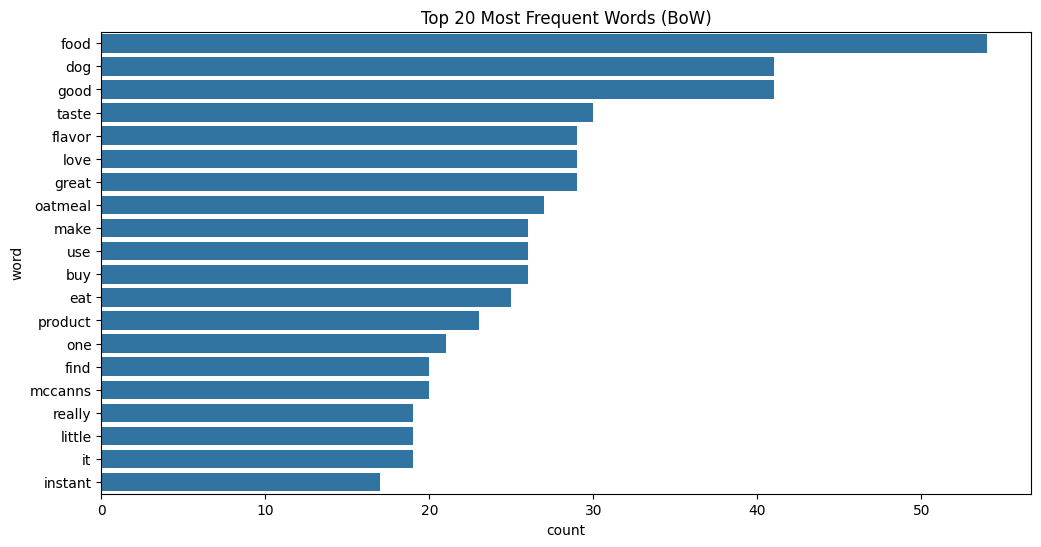

In [41]:
# [8] Bag of Words (BoW) Implementation
print("=== Bag of Words Implementation ===")

from sklearn.feature_extraction.text import CountVectorizer

# Create BoW model
vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
bow_matrix = vectorizer.fit_transform(processed_reviews)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

print(f"BoW Matrix Shape: {bow_matrix.shape}")
print(f"First 20 features: {feature_names[:20]}")
print(f"Sample BoW vector: {bow_matrix[0].toarray()[0][:20]}")

# Visualize most common words
word_counts = np.array(bow_matrix.sum(axis=0)).flatten()
word_freq = pd.DataFrame({
    'word': feature_names,
    'count': word_counts
}).sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq.head(20), x='count', y='word')
plt.title('Top 20 Most Frequent Words (BoW)')
plt.show()

In [42]:
# [9] TF-IDF Implementation
print("=== TF-IDF Implementation ===")

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF model
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_reviews)

# Get TF-IDF features
tfidf_features = tfidf_vectorizer.get_feature_names_out()

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"First 20 TF-IDF features: {tfidf_features[:20]}")

# Get top TF-IDF scores for first document
first_doc_scores = tfidf_matrix[0].toarray().flatten()
top_indices = first_doc_scores.argsort()[-10:][::-1]
top_words = [(tfidf_features[i], first_doc_scores[i]) for i in top_indices]

print("\nTop 10 words in first document (TF-IDF):")
for word, score in top_words:
    print(f"{word}: {score:.4f}")

=== TF-IDF Implementation ===
TF-IDF Matrix Shape: (100, 1000)
First 20 TF-IDF features: ['00 per' '10' '10 cheaper' '100' '100 pound' '10count' '10count box'
 '10lb' '10lb twin' '10lbs' '10lbs bear' '112' '112 cup' '112 year' '13'
 '13 bag' '20' '30' 'able' 'across']

Top 10 words in first document (TF-IDF):
better: 0.4055
product: 0.3582
smell: 0.2846
several: 0.2846
quality product: 0.2846
good quality: 0.2846
can: 0.2665
products: 0.2409
look: 0.2154
quality: 0.2154


=== Word Cloud Visualization ===


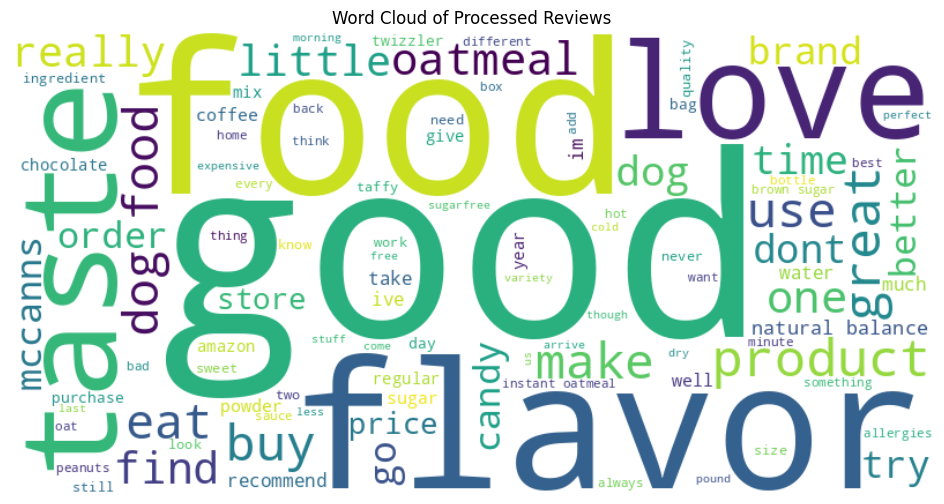

In [43]:
# [10] Word Cloud Visualization
print("=== Word Cloud Visualization ===")

# Combine all processed text
all_text = ' '.join(processed_reviews)

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Reviews')
plt.show()

In [44]:
# [11] Advanced: One-Hot Encoding Implementation
print("=== One-Hot Encoding ===")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Sample categorical data (product categories)
# For demonstration, we'll use the first 1000 words from our corpus
sample_words = [word for text in processed_reviews[:50] for word in text.split()][:1000]

# Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(sample_words)

print(f"Original words sample: {sample_words[:10]}")
print(f"Integer encoded sample: {integer_encoded[:10]}")

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded_reshaped = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_reshaped)

print(f"One-hot encoded shape: {onehot_encoded.shape}")
print(f"One-hot sample (first 5 words, first 10 features):")
print(onehot_encoded[:5, :10])

=== One-Hot Encoding ===
Original words sample: ['buy', 'several', 'vitality', 'can', 'dog', 'food', 'products', 'find', 'good', 'quality.']
Integer encoded sample: [ 70 443 557  75 135 189 396 179 207 403]
One-hot encoded shape: (1000, 590)
One-hot sample (first 5 words, first 10 features):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
# [12] Advanced: Word2Vec Implementation
print("=== Word2Vec Implementation ===")

from gensim.models import Word2Vec

# Prepare tokenized sentences for Word2Vec
tokenized_sentences = [nltk.word_tokenize(text) for text in processed_reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,      # Dimension of word vectors
    window=5,            # Context window size
    min_count=2,         # Ignore words with lower frequency
    workers=4,           # Number of CPU cores
    sg=1                 # Skip-gram (1) or CBOW (0)
)

print(f"Word2Vec vocabulary size: {len(word2vec_model.wv.key_to_index)}")

# Find similar words
try:
    similar_words = word2vec_model.wv.most_similar('good', topn=5)
    print("\nWords similar to 'good':")
    for word, score in similar_words:
        print(f"{word}: {score:.4f}")
except KeyError:
    print("Word 'good' not in vocabulary")

# Get word vector
try:
    word_vector = word2vec_model.wv['good']
    print(f"\nVector for 'good' (first 10 dimensions): {word_vector[:10]}")
except KeyError:
    print("Word 'good' not in vocabulary")

=== Word2Vec Implementation ===
Word2Vec vocabulary size: 544

Words similar to 'good':
.: 0.9975
make: 0.9972
food: 0.9970
size: 0.9970
!: 0.9970

Vector for 'good' (first 10 dimensions): [-0.05274007  0.08947463  0.08797     0.09605241 -0.05507512 -0.1090087
  0.140806    0.21479587 -0.14075196 -0.05735025]


In [46]:
# [13] Advanced Analysis: Compare Different Rating Categories
print("=== Analysis by Rating Categories ===")

# Create subsets based on ratings
positive_reviews = df[df['Score'] >= 4]['Text'].head(500).tolist()
negative_reviews = df[df['Score'] <= 2]['Text'].head(500).tolist()

print(f"Positive reviews (4-5 stars): {len(positive_reviews)}")
print(f"Negative reviews (1-2 stars): {len(negative_reviews)}")

# Preprocess both categories
positive_processed = [preprocessor.full_preprocess(review) for review in positive_reviews[:100]]
negative_processed = [preprocessor.full_preprocess(review) for review in negative_reviews[:100]]


# Compare word frequencies (using proper tokenization)
positive_words = [word for text in positive_processed for word in preprocessor.tokenize_processed_text(text)]
negative_words = [word for text in negative_processed for word in preprocessor.tokenize_processed_text(text)]

positive_freq = Counter(positive_words)
negative_freq = Counter(negative_words)

print("\nTop 10 words in positive reviews:")
for word, count in positive_freq.most_common(10):
    print(f"{word}: {count}")

print("\nTop 10 words in negative reviews:")
for word, count in negative_freq.most_common(10):
    print(f"{word}: {count}")

=== Analysis by Rating Categories ===
Positive reviews (4-5 stars): 500
Negative reviews (1-2 stars): 500

Top 10 words in positive reviews:
.: 374
!: 79
food: 64
good: 42
love: 41
dog: 36
great: 35
taste: 31
buy: 28
one: 28

Top 10 words in negative reviews:
.: 440
chip: 93
taste: 65
!: 59
bag: 53
kettle: 44
buy: 35
flavor: 34
brand: 31
food: 26


=== Performance Analysis ===
Average time per step (seconds):
lowercasing: 0.000002
stopword_removal: 0.000062
lemmatization: 0.000408


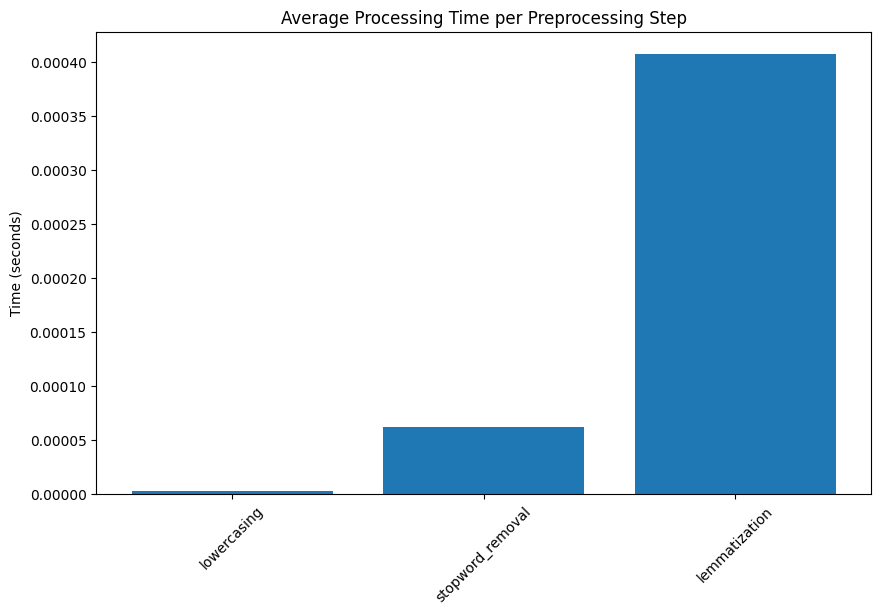

In [47]:
# [14] Performance Analysis
print("=== Performance Analysis ===")

import time
from collections import defaultdict

# Measure time for different preprocessing steps
times = defaultdict(list)

for review in sample_texts[:50]:
    # Lowercasing
    start = time.time()
    preprocessor.lowercase(review)
    times['lowercasing'].append(time.time() - start)

    # Stopword removal
    start = time.time()
    preprocessor.remove_stopwords(review)
    times['stopword_removal'].append(time.time() - start)

    # Lemmatization
    start = time.time()
    preprocessor.lemmatization(review)
    times['lemmatization'].append(time.time() - start)

# Calculate average times
avg_times = {step: np.mean(times[step]) for step in times}
print("Average time per step (seconds):")
for step, avg_time in avg_times.items():
    print(f"{step}: {avg_time:.6f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(avg_times.keys(), avg_times.values())
plt.title('Average Processing Time per Preprocessing Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.show()

=== Comprehensive Analysis ===
Text Statistics Comparison:
                Metric     Original    Processed  Reduction (%)
0  Average Text Length    79.130000    37.890000      52.116770
1      Vocabulary Size  1795.000000  1343.000000      25.181058
2  Average Word Length     3.757109     4.934811     -31.345986


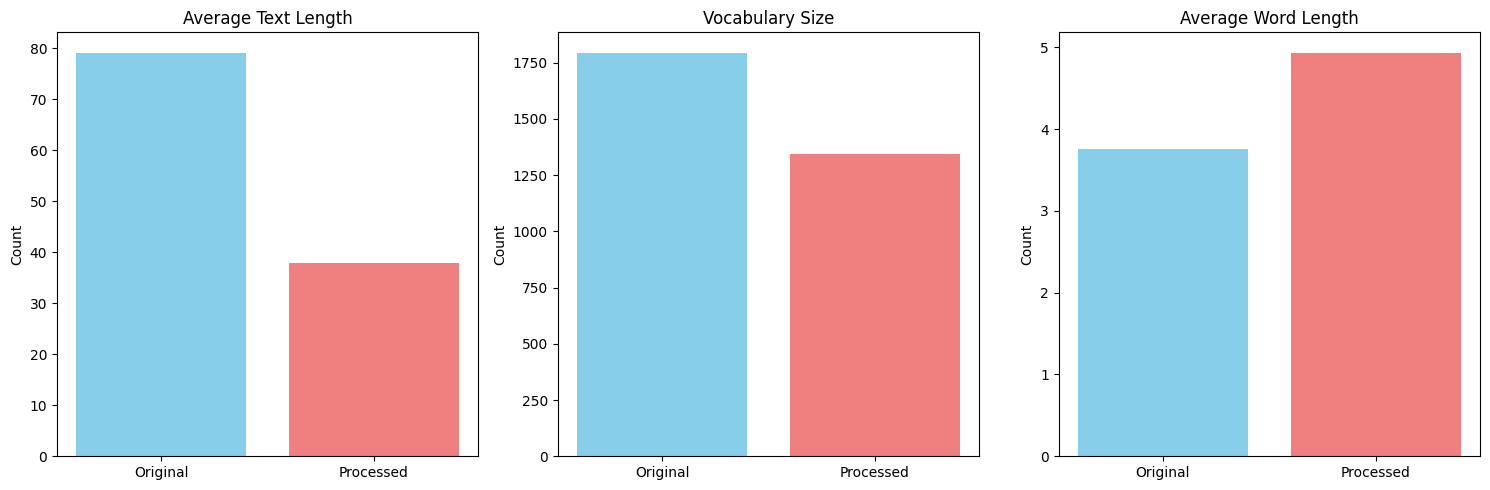


=== Dataset Summary ===
Dataset Source: Amazon Fine Food Reviews from Kaggle
Total Reviews in Full Dataset: 568,454
Reviews Processed in this Analysis: 100
Preprocessing Steps Applied: Lowercasing, URL/HTML removal, Punctuation removal, Stopword removal, Lemmatization


In [48]:
# [15] Final Comprehensive Analysis
print("=== Comprehensive Analysis ===")

# Compare original vs processed text statistics using the correct method names
original_stats = {
    'avg_length': np.mean([len(preprocessor.robust_tokenize(text)) for text in sample_texts[:100]]),
    'vocab_size': len(set([word for text in sample_texts[:100] for word in preprocessor.robust_tokenize(text)])),
    'avg_word_length': np.mean([len(word) for text in sample_texts[:100] for word in preprocessor.robust_tokenize(text)])
}

processed_stats = {
    'avg_length': np.mean([len(preprocessor.tokenize_processed_text(text)) for text in processed_reviews]),
    'vocab_size': len(set([word for text in processed_reviews for word in preprocessor.tokenize_processed_text(text)])),
    'avg_word_length': np.mean([len(word) for text in processed_reviews for word in preprocessor.tokenize_processed_text(text)])
}

# Create comparison data in a different format to avoid the pandas error
comparison_data = {
    'Metric': ['Average Text Length', 'Vocabulary Size', 'Average Word Length'],
    'Original': [original_stats['avg_length'], original_stats['vocab_size'], original_stats['avg_word_length']],
    'Processed': [processed_stats['avg_length'], processed_stats['vocab_size'], processed_stats['avg_word_length']],
    'Reduction (%)': [
        (original_stats['avg_length'] - processed_stats['avg_length']) / original_stats['avg_length'] * 100,
        (original_stats['vocab_size'] - processed_stats['vocab_size']) / original_stats['vocab_size'] * 100,
        (original_stats['avg_word_length'] - processed_stats['avg_word_length']) / original_stats['avg_word_length'] * 100
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Text Statistics Comparison:")
print(comparison_df)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['avg_length', 'vocab_size', 'avg_word_length']
titles = ['Average Text Length', 'Vocabulary Size', 'Average Word Length']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    axes[i].bar(['Original', 'Processed'],
                [original_stats[metric], processed_stats[metric]],
                color=['skyblue', 'lightcoral'])
    axes[i].set_title(title)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n=== Dataset Summary ===")
print(f"Dataset Source: Amazon Fine Food Reviews from Kaggle")
print(f"Total Reviews in Full Dataset: {len(df):,}")
print(f"Reviews Processed in this Analysis: {len(processed_reviews)}")
print(f"Preprocessing Steps Applied: Lowercasing, URL/HTML removal, Punctuation removal, Stopword removal, Lemmatization")